In [1]:
import uproot
import awkward as ak
import json

import sys
import os

# Añade el directorio padre al sys.path
sys.path.append(os.path.abspath("/eos/home-d/dcostasr/SWAN_projects/2025_data"))
sys.path.append('/eos/home-d/dcostasr/SWAN_projects/software/hipy')

import numpy as np
import pandas as pd
import hipy.pltext as pltext
import matplotlib.pyplot as plt

from wcte.brbtools import sort_run_files, get_part_files, select_good_parts, get_files_from_part
from wcte.brbtools import create_df_from_file, df_extend, filter_times_and_relocate_columns, df_mpmt_sumCharge
from wcte.mapping  import id_names
from tqdm          import tqdm

In [2]:
def create_df_from_file(files):
    """
    Input the information created with get_files_from_part.
    Creates a Pandas DataFrame with the event, card, channel, charge and time information.
    Returns the DataFrame.
    """
    cards        = files[0]
    channels     = files[1]
    charges      = files[2]
    hit_times    = files[3]
    window_times = files[4]

    nevents = len(cards)
    evts    = np.arange(nevents)
    nhits   = [len(cards[ievt]) for ievt in evts]
    evt_column = np.repeat(evts, nhits)
    window_column = np.repeat(window_times, nhits)

    xcards    = ak.flatten(cards)
    xchannels = ak.flatten(channels)
    xcharges  = ak.flatten(charges)
    xtimes    = ak.flatten(hit_times)
    df = pd.DataFrame({'evt':evt_column, 'window_time':window_column, 'card':xcards, 'channel':xchannels, 'charge':xcharges, "time":xtimes})
    return df

In [3]:
run        = 1724
map        = id_names
run_files  = sort_run_files(f"/eos/experiment/wcte/data/2025_commissioning/offline_data/{run}/WCTE_offline_R{run}S*P*.root")
part_files = get_part_files(run_files)
# good_parts = select_good_parts(part_files, run_files)

In [4]:
part_files

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42]

In [5]:
df_part0 = create_df_from_file(get_files_from_part(part_files[0], run_files))
df_part0

,evt,window_time,card,channel,charge,time
0,0,1.235062e+07,93,15,82.0,41290.171143
1,0,1.235062e+07,93,4,173.0,199259.202393
2,0,1.235062e+07,93,0,174.0,260076.079590
3,0,1.235062e+07,93,16,129.0,260079.487549
4,0,1.235062e+07,93,10,128.0,260086.156738
...,...,...,...,...,...,...
8085928,11112,1.853111e+10,33,17,273.0,405846.599854
8085929,11112,1.853111e+10,33,18,123.0,405846.975708
8085930,11112,1.853111e+10,33,6,167.0,408872.112061
8085931,11112,1.853111e+10,33,13,180.0,412782.343018


In [61]:
df_part1 = create_df_from_file(get_files_from_part(part_files[1], run_files))
events_offseted = df_part1.evt.values + (np.max(df_part0.evt) + 1)
df_part1["evt"] = events_offseted
df_part1

,evt,window_time,card,channel,charge,time
0,11113,1.853278e+10,22,9,148.0,189426.197388
1,11113,1.853278e+10,84,17,202.0,118155.855957
2,11113,1.853278e+10,84,7,66.0,304454.343018
3,11113,1.853278e+10,14,4,96.0,66992.217529
4,11113,1.853278e+10,14,17,97.0,487598.013550
...,...,...,...,...,...,...
12867054,29107,4.852077e+10,74,13,105.0,8122.171143
12867055,29107,4.852077e+10,74,0,485.0,23799.695190
12867056,29107,4.852077e+10,74,9,138.0,159995.296875
12867057,29107,4.852077e+10,74,13,92.0,380982.048828


In [7]:
df_part2 = create_df_from_file(get_files_from_part(good_parts[2], run_files))
events_offseted = df_part2.evt.values + (np.max(df_part1.evt) + 1)
df_part2["evt"] = events_offseted
df_part2

,evt,card,channel,charge,time
0,723,41,1,273.0,1.416107e+10
1,723,41,4,216.0,1.416107e+10
2,723,41,5,69.0,1.416107e+10
3,723,41,7,168.0,1.416107e+10
4,723,41,9,281.0,1.416107e+10
...,...,...,...,...,...
43062121,1169,102,8,58.0,9.801985e+09
43062122,1169,102,8,294.0,9.801985e+09
43062123,1169,102,8,221.0,9.801986e+09
43062124,1169,102,8,263.0,9.801987e+09


In [8]:
df_part3 = create_df_from_file(get_files_from_part(good_parts[3], run_files))
events_offseted = df_part3.evt.values + (np.max(df_part2.evt) + 1)
df_part3["evt"] = events_offseted
df_part3

,evt,card,channel,charge,time
0,1170,115,2,172.0,9.801387e+09
1,1170,115,14,159.0,9.801387e+09
2,1170,115,0,131.0,9.801387e+09
3,1170,115,1,326.0,9.801387e+09
4,1170,115,3,211.0,9.801387e+09
...,...,...,...,...,...
42981597,1616,46,5,107.0,5.441472e+09
42981598,1616,46,0,107.0,5.441966e+09
42981599,1616,46,9,107.0,5.442296e+09
42981600,1616,46,16,62.0,5.442368e+09


In [9]:
cards = np.unique(df_part0["card"])

In [10]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('./figures/hit_time_rollover.pdf') as pdf:
    for card in tqdm(cards, total=len(cards)):

        # # Part 0
        # events_part0 = df_part0[(df_part0["card"].values == card)]["evt"].values
        # times_part0  = df_part0[(df_part0["card"].values == card)]["time"].values

        # Part 1
        events_part1 = df_part1[(df_part1["card"].values == card)]["evt"].values
        times_part1  = df_part1[(df_part1["card"].values == card)]["time"].values

        # plt.scatter(events_part0, times_part0/1e9, marker="_");
        plt.scatter(events_part1, times_part1/1e9, marker=".", s=100, label=f"Card {card}");
        plt.xlim(508, 514);
        plt.xlabel("Event Number");
        plt.ylabel("Hit Time [s]");
        plt.legend(loc="upper right")

        pdf.savefig()
        plt.close()

100%|██████████| 83/83 [00:15<00:00,  5.26it/s]


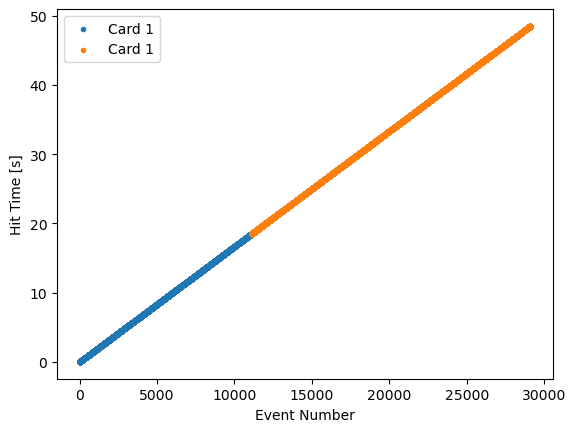

In [62]:
card = 1

# Part 0
events_part0 = df_part0[(df_part0["card"].values == card)]["evt"].values
times_part0  = df_part0[(df_part0["card"].values == card)]["time"].values + df_part0[(df_part0["card"].values == card)]["window_time"].values

# Part 1
events_part1 = df_part1[(df_part1["card"].values == card)]["evt"].values
times_part1  = df_part1[(df_part1["card"].values == card)]["time"].values + df_part1[(df_part1["card"].values == card)]["window_time"].values

plt.scatter(events_part0, times_part0/1e9, marker=".", label=f"Card {card}");
plt.scatter(events_part1, times_part1/1e9, marker=".", label=f"Card {card}");
# plt.xlim(-1, 50);
# plt.ylim(0, 1e8);
plt.xlabel("Event Number");
plt.ylabel("Hit Time [s]");
plt.legend(loc="upper left");

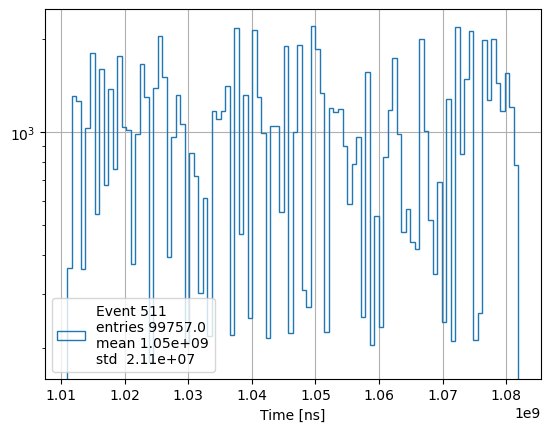

In [56]:
part1_times_event_511 = df_part1[(df_part1["evt"].values == 511)]["time"].values
part1_times_event_527 = df_part1[(df_part1["evt"].values == 527)]["time"].values

pltext.hist(part1_times_event_527, 100, xylabels=("Time [ns]"), ylog=True, formate=".2e", label="Event 511");
# plt.text(0.5e10, 3.7e4, f"Min Time:  {np.min(part1_times_event_527):.2e} ns");
# plt.text(0.5e10, 3e4, f"Max Time: {np.max(part1_times_event_527):.2e} ns");

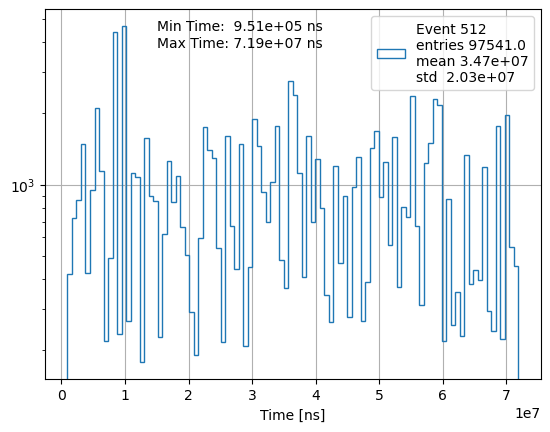

In [13]:
pltext.hist(part1_times_event_512, 100, xylabels=("Time [ns]"), ylog=True, label="Event 512", formate=".2e");
plt.text(1.5e7, 4500, f"Min Time:  {np.min(part1_times_event_512):.2e} ns");
plt.text(1.5e7, 3800, f"Max Time: {np.max(part1_times_event_512):.2e} ns");

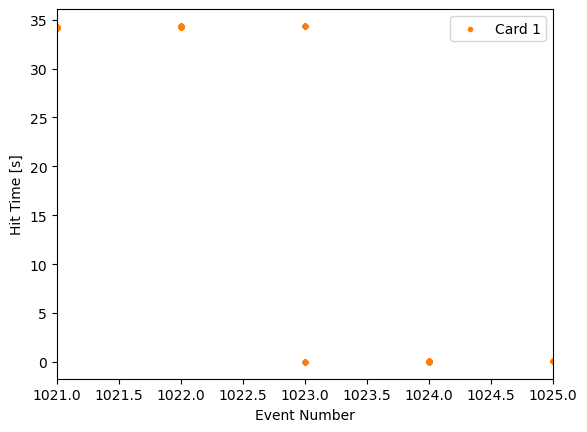

In [14]:
card = 1

# Part 1
events_part1 = df_part1[(df_part1["card"].values == card)]["evt"].values
times_part1  = df_part1[(df_part1["card"].values == card)]["time"].values

# Part 2
events_part2 = df_part2[(df_part2["card"].values == card)]["evt"].values
times_part2  = df_part2[(df_part2["card"].values == card)]["time"].values

plt.scatter(events_part1, times_part1/1e9, marker="_");
plt.scatter(events_part2, times_part2/1e9, marker=".", label=f"Card {card}");
plt.xlim(1021, 1025);
plt.xlabel("Event Number");
plt.ylabel("Hit Time [s]");
plt.legend(loc="upper right");

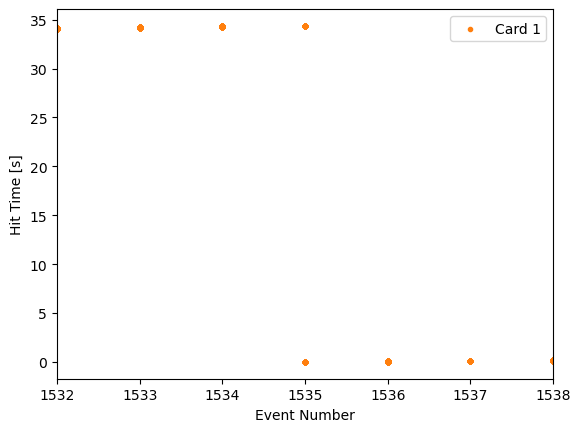

In [15]:
card = 1

# Part 2
events_part2 = df_part2[(df_part2["card"].values == card)]["evt"].values
times_part2  = df_part2[(df_part2["card"].values == card)]["time"].values

# Part 3
events_part3 = df_part3[(df_part3["card"].values == card)]["evt"].values
times_part3  = df_part3[(df_part3["card"].values == card)]["time"].values

plt.scatter(events_part2, times_part2/1e9, marker="_");
plt.scatter(events_part3, times_part3/1e9, marker=".", label=f"Card {card}");
plt.xlim(1532, 1538);
plt.xlabel("Event Number");
plt.ylabel("Hit Time [s]");
plt.legend(loc="upper right");

In [38]:
close_to_zero = part1_times_event_511[(part1_times_event_511 <= 2**30)]
close_to_good = part1_times_event_511[(part1_times_event_511 > 2**30)]

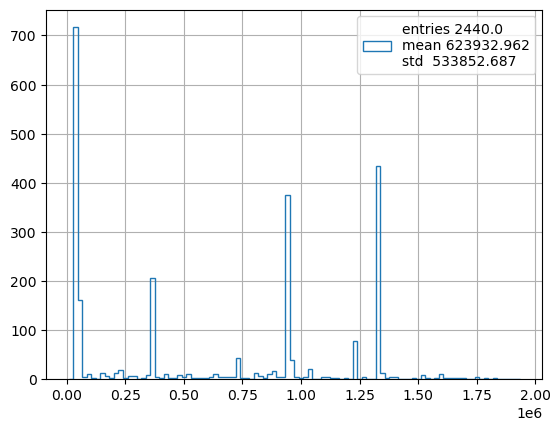

In [37]:
pltext.hist(close_to_zero, 100);

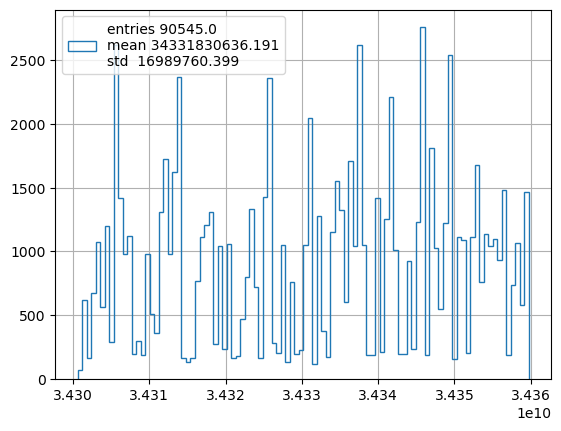

In [39]:
pltext.hist(close_to_good, 100);

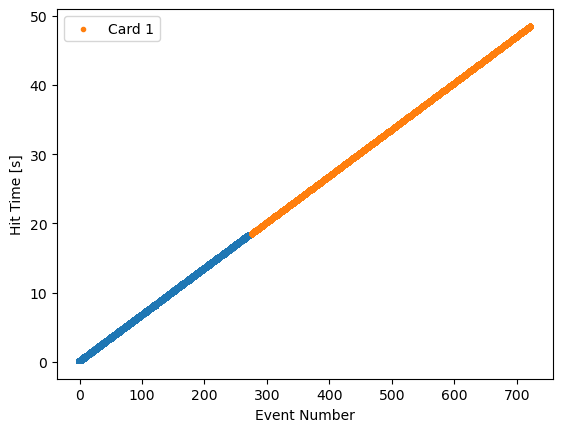

In [76]:
card = 1

# # Part 0
events_part0 = df_part0[(df_part0["card"].values == card)]["evt"].values
times_part0  = df_part0[(df_part0["card"].values == card)]["time"].values

# Part 1
events_part1 = df_part1[(df_part1["card"].values == card)]["evt"].values
times_part1  = df_part1[(df_part1["card"].values == card)]["time"].values

plt.scatter(events_part0, times_part0/1e9, marker="_");
plt.scatter(events_part1, corrected_times_part1/1e9, marker=".", label=f"Card {card}");
# plt.xlim(524, 530);
plt.xlabel("Event Number");
plt.ylabel("Hit Time [s]");
plt.legend(loc="upper left");

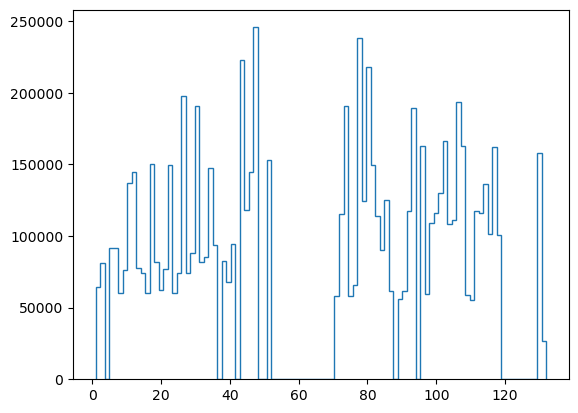

In [11]:
plt.hist(df_part0["card"].values, 100, histtype="step");

In [13]:
df_part0["card"].values.max()

132